# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [11]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [12]:
tips_df = sns.load_dataset("tips")
tips_df['tip_pct'] = tips_df['tip'] / (tips_df['total_bill'] - tips_df['tip'])
tips_df['net_bill'] = tips_df['total_bill'] - tips_df['tip']
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [13]:
X = tips_df['net_bill']  # Variável independente
y = tips_df['tip']       # Variável dependente
X = sm.add_constant(X)   

model = sm.OLS(y, X).fit()

model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 06 May 2024   Prob (F-statistic):           5.02e-23
Time:                        20:11:46   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

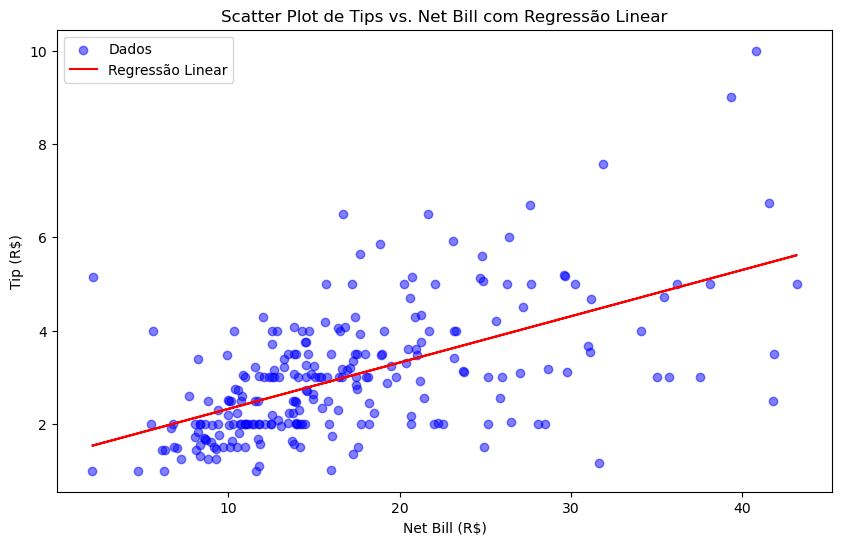

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(tips_df['net_bill'], tips_df['tip'], color='blue', alpha=0.5, label='Dados')
plt.plot(tips_df['net_bill'], model.predict(sm.add_constant(tips_df['net_bill'])), color='red', label='Regressão Linear')

plt.title('Scatter Plot de Tips vs. Net Bill com Regressão Linear')
plt.xlabel('Net Bill (R$)')
plt.ylabel('Tip (R$)')
plt.legend()

plt.show()


Há uma tendência clara de aumento nas gorjetas conforme o valor da conta líquida aumenta, o que é consistente com o coeficiente positivo encontrado na análise de regressão.

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [15]:
X_pct = tips_df['net_bill']
y_pct = tips_df['tip_pct']
X_pct = sm.add_constant(X_pct)

model_pct = sm.OLS(y_pct, X_pct).fit()

model_pct_summary = model_pct.summary()
model_pct_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Mon, 06 May 2024   Prob (F-statistic):           1.52e-06
Time:                        20:20:11   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

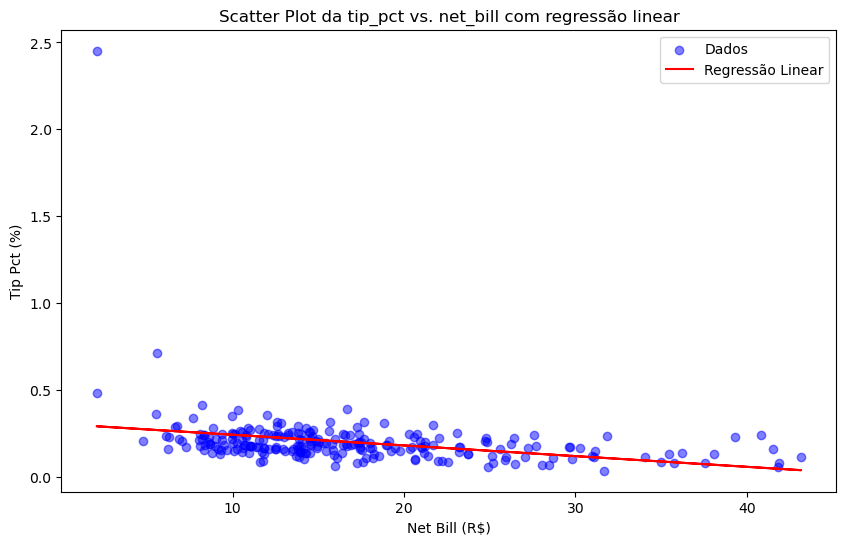

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(tips_df['net_bill'], tips_df['tip_pct'], color='blue', alpha=0.5, label='Dados')
plt.plot(tips_df['net_bill'], model_pct.predict(sm.add_constant(tips_df['net_bill'])), color='red', label='Regressão Linear')

# Adding labels and title
plt.title('Scatter Plot da tip_pct vs. net_bill com regressão linear')
plt.xlabel('Net Bill (R$)')
plt.ylabel('Tip Pct (%)')
plt.legend()

# Show plot
plt.show()

A linha de regressão mostra uma tendência de diminuição na porcentagem da gorjeta conforme o valor da conta aumenta. Isso está em conformidade com o coeficiente negativo encontrado na regressão, indicando uma leve tendência de dar uma menor porcentagem de gorjeta à medida que a conta aumenta.

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

O primeiro gráfico mostra uma relação positiva entre a gorjeta em dólares e o 'net_bill'. A linha de regressão é ascendente, indicando que quanto maior a conta líquida, maior a gorjeta em termos absolutos.

O segundo gráfico mostra uma relação negativa entre a porcentagem da gorjeta e o 'net_bill'. A linha de regressão é descendente, indicando que quanto maior a conta líquida, menor a porcentagem da gorjeta.

O R-quadrado mais alto para a gorjeta em dólares sugere uma relação mais forte com 'net_bill' do que a porcentagem da gorjeta, que tem uma relação mais fraca e menos explicativa. Isso pode ser devido ao fato de que, em valores absolutos, clientes tendem a aumentar a gorjeta com o aumento do valor da conta, mas proporcionalmente, tendem a dar uma menor porcentagem à medida que a conta cresce.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [18]:
predicted_tip_pct = model_pct.fittedvalues
predicted_tip_pct.head()

0    0.207087
1    0.251951
2    0.197684
3    0.180107
4    0.176358
dtype: float64

In [19]:
predicted_tip = predicted_tip_pct * tips_df['net_bill']
predicted_tip.head()


0    3.309254
1    2.186938
2    3.461450
3    3.668785
4    3.699998
dtype: float64

In [20]:
X = tips_df['net_bill']
y = tips_df['tip']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()

r_squared = model.rsquared
print(r_squared)


0.3325407312323706
